In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Content/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

### Analisa Descriptive Statistic
1. Berapa rata rata umur pada data tersebut?
2. Berapa rata rata nilai BMI dari yang merokok?
3. Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?
4. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?
5. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?
6. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25
atau non perokok yang BMI nya diatas 25 (overweight)
7. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?


1. Berapa rata rata umur pada data tersebut?

In [ ]:
mean_age = data['age'].mean().round(3)
mean_male_age = data[data['sex'] == 'male']['age'].mean().round(3)
mean_female_age = data[data['sex'] == 'female']['age'].mean().round(3)

print('Rata - rata umur:', mean_age)
print(mean_male_age)
print(mean_female_age)

Rata - rata umur: 39.207
38.917
39.503


2. Berapa rata rata nilai BMI dari yang merokok?

In [ ]:
# Menghitung rerata BMI untuk perokok
mean_smoker_bmi = data[data['smoker'] == 'yes']['bmi'].mean().round(3)

# Menghitung rerata BMI untuk non perokok
mean_nonsmoker_bmi = data[data['smoker'] == 'no']['bmi'].mean().round(3)

# Mencetak
print("Rata-rata BMI Perokok:", mean_smoker_bmi)
print("Rata-rata BMI Bukan Perokok:", mean_nonsmoker_bmi)


Rata-rata BMI Perokok: 30.708
Rata-rata BMI Bukan Perokok: 30.652


Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?

In [ ]:
variance_smoker = data[data['smoker'] == 'yes']['charges'].var().round(3)
variance_nonsmoker = data[data['smoker'] == 'no']['charges'].var().round(3)

print("Variansi Tagihan Kesehatan Perokok:", variance_smoker)
print("Variansi Tagihan Kesehatan Non Perokok:", variance_nonsmoker)

if variance_smoker == variance_nonsmoker:
  print("variansi dari tagihan kesehatan perokok dan non perokok sama")
else:
  print("variansi dari tagihan kesehatan perokok dan non perokok berbeda")

Variansi Tagihan Kesehatan Perokok: 133207311.206
Variansi Tagihan Kesehatan Non Perokok: 35925420.496
variansi dari tagihan kesehatan perokok dan non perokok berbeda


Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

In [ ]:
# Menghitung rata-rata tagihan kesehatan perokok
mean_charges_smoker = data[data['smoker'] == 'yes']['charges'].mean().round(3)

# Menghitung rata-rata tagihan kesehatan non perokok
mean_charges_nonsmoker = data[data['smoker'] == 'no']['charges'].mean().round(3)

# Tampilkan hasil
print("Rata-rata Tagihan Kesehatan Perokok:", mean_charges_smoker)
print("Rata-rata Tagihan Kesehatan Non Perokok:", mean_charges_nonsmoker)

Rata-rata Tagihan Kesehatan Perokok: 32050.232
Rata-rata Tagihan Kesehatan Non Perokok: 8434.268


Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

In [ ]:
mean_smoker_bmi_above = data[(data['smoker'] == 'yes') & (data['bmi'] > 25)]['charges'].mean().round(3)

# Hitung rata-rata tagihan kesehatan non perokok dengan BMI di atas 25
mean_nonsmoker_bmi_above = data[(data['smoker'] == 'no') & (data['bmi'] > 25)]['charges'].mean().round(3)

# Tampilkan hasil
print("Rata-rata Tagihan Kesehatan Perokok (BMI > 25):", mean_smoker_bmi_above)
print("Rata-rata Tagihan Kesehatan Non Perokok (BMI > 25):", mean_nonsmoker_bmi_above)

Rata-rata Tagihan Kesehatan Perokok (BMI > 25): 35116.91
Rata-rata Tagihan Kesehatan Non Perokok (BMI > 25): 8629.59


### Analisa Variabel Diskrit

1. Gender mana yang memiliki tagihan paling tinggi?
2. Distribusi peluang tagihan di tiap-tiap region
3. Apakah setiap region memiliki proporsi data banyak orang yang sama?
4. Mana yang lebih tinggi proporsi perokok atau non perokok?
5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
7. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?



In [ ]:
gender_mean_charges = data.groupby('sex')['charges'].mean().round(3)
print(gender_mean_charges)

sex
female    12569.579
male      13956.751
Name: charges, dtype: float64


In [ ]:
gender_highest_charges = gender_mean_charges.idxmax()
find_highest_charges = data.groupby('sex')['charges'].max().round(3)

print("Gender dengan Tagihan Tertinggi:", gender_highest_charges)
print("Tagihan Tertinggi:\n",find_highest_charges)

Gender dengan Tagihan Tertinggi: male
Tagihan Tertinggi:
 sex
female    63770.428
male      62592.873
Name: charges, dtype: float64


In [ ]:
# Menghitung total jumlah perokok
proporsion = data['region'].value_counts(normalize=True)
proporsion


southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

In [ ]:
count_region = data.groupby('region').size()
count_region

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

In [ ]:
#Menghitung proporsi perokok dan non perokok
smoker_proporsion = (data['smoker'] == 'yes').mean().round(3)
nonsmoker_proporsion = (data['smoker'] == 'no').mean().round(3)

print("Proporsi Perokok:", smoker_proporsion)
print("Proporsi Non Perokok:", nonsmoker_proporsion)

Proporsi Perokok: 0.205
Proporsi Non Perokok: 0.795


In [ ]:
# Menghitung jumlah perokok perempuan
total_female_smoker = data[data.smoker == 'yes'].groupby('sex').size()['female']

# Menghitung total jumlah perokok
total_smoker = data[data.smoker == 'yes'].groupby('sex').size().sum()

# Menghitung peluang perempuan jika diketahui perokok
female_given_smoker_chance = round((total_female_smoker / total_smoker),3)

print("Peluang Female | Smoker:", female_given_smoker_chance)

Peluang Female | Smoker: 0.42


### Analisa Variabel Kontinu
1. Mana yang lebih mungkin terjadi
> a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
>
> b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

2. Mana yang lebih mungkin terjadi:
> a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
>
>b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k




In [ ]:
# Hitung proporsi data dengan BMI di atas 25 dan tagihan kesehatan di atas 16.7k
proporsion_a = ((data['bmi'] > 25) & (data['charges'] > 16700)).sum() / len(data)

# Hitung proporsi data dengan BMI di bawah 25 dan tagihan kesehatan di atas 16.7k
proporsion_b = ((data['bmi'] < 25) & (data['charges'] > 16700)).sum() / len(data)

print('Proporsi kasus 1a:', proporsion_a)
print('Proporsi kasus 1b:', proporsion_b)

if proporsion_a > proporsion_b:
  print('Case A lebih mungkin terjadi daripada Case B')
else:
  print('Case B lebih mungkin terjadi daripada Case A')

Proporsi kasus 1a: 1.0
Proporsi kasus 1b: 1.0
Case B lebih mungkin terjadi daripada Case A


In [ ]:
# Cek kondisi a
a = len(data[(data['smoker'] == 'yes') & (data['bmi'] > 25) & (data['charges'] > 16700)])

# Cek kondisi b
b = len(data[(data['smoker'] == 'no') & (data['bmi'] > 25) & (data['charges'] > 16700)])

# Hitung proporsi kasus a
proporsion_a = a / len(data)

# Hitung Proporsi kasus b
proporsion_b = b / len(data)

print("Proporsi kasus 2a:", proporsion_a)
print("Proporsi kasus 2b:", proporsion_b)
if proporsion_a > proporsion_b:
  print('Case A lebih mungkin terjadi daripada Case B')
else:
  print('Case B lebih mungkin terjadi daripada Case A')

Proporsi kasus 2a: 0.16068759342301944
Proporsi kasus 2b: 0.05082212257100149
Case A lebih mungkin terjadi daripada Case B


### Analisa Korelasi Variabel

<ipython-input-11-84254d53b505>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


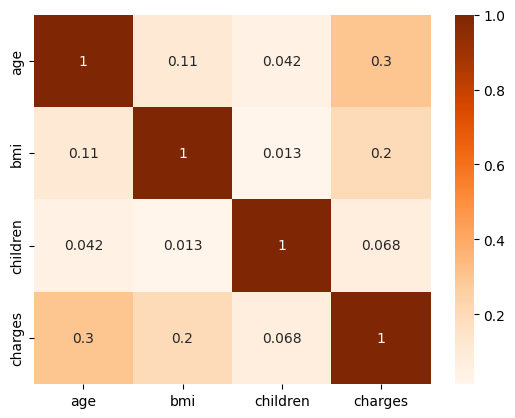

In [ ]:
# Melihat korelasi variabel antar kolom
corr = data.corr()

# Mencetak hasil korelasi
print(corr)

# Menampilkan heatmap
sns.heatmap(corr, annot=True, cmap='Oranges')
plt.show()

### Pengujian Hipotesis


1.   Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
2.   Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25
3. Tagihan kesehatan laki-laki lebih besar dari perempuan

In [ ]:
# 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

# Hitung menggunakan Uji t-test
smoker_charge = data[data['smoker'] == 'yes']['charges']
nonsmoker_charge = data[data['smoker'] == 'no']['charges']
t_statistic, p_value = ttest_ind(smoker_charge, nonsmoker_charge)

# Tampilkan hasil uji t-test
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
    print('Hipotesis nol diterima | hipotesis satu ditolak. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok')
else:
    print('Hipotesis nol ditolak | hipotesis satu diterima. Tagihan kesehatan perokok kurang dari atau sama dengan tagihan kesehatan non perokok')

T-Statistic: 46.66492117272371
P-Value: 8.271435842179102e-283
Hipotesis nol ditolak | hipotesis satu diterima. Tagihan kesehatan perokok kurang dari atau sama dengan tagihan kesehatan non perokok


In [ ]:
# 2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

# Hitung menggunakan uji T-test
above_bmi_charges = data[data['bmi'] > 25]['charges']
below_bmi_charges = data[data['bmi'] <= 25]['charges']
t_statistic, p_value = ttest_ind(above_bmi_charges, below_bmi_charges)

# Tampilkan hasil uji t-test
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
    print('Hipotesis nol diterima | hipotesis satu ditolak, Tagihan kesehatan dengan BMI diatas 25 kurang dari atau sama dengan tagihan kesehatan dengan BMI dibawah 25')
else:
    print('Hipotesis nol ditolak | hipotesis satu diterima, Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25')



T-Statistic: 4.319946909530397
P-Value: 1.6761321969419405e-05
Terdapat bukti yang cukup untuk menolak H0


In [ ]:
# 3. Tagihan Kesehatan laki — laki lebih besar dari perempuan

male_charges = data[data['sex'] == 'male']['charges']
female_charges = data[data['sex'] == 'female']['charges']
t_statistic, p_value = ttest_ind(male_charges, female_charges)

# Tampilkan hasil uji t-test
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
   print('Hipotesis nol diterima | hipotesis satu ditolak, Tagihan Kesehatan laki — laki lebih besar dari tagihan perempuan')
else:
    print('Hipotesis nol ditolak | hipotesis satu diterima, Tagihan Kesehatan laki - laki kurang dari atau sama dengan tagihan perempuan')



T-Statistic: 2.097546590051688
P-Value: 0.03613272100592976
Hipotesis nol diterima | hipotesis satu ditolak, Tagihan Kesehatan laki — laki lebih besar dari perempuan
